1.1 Objective
The objective of this Kernel is to create a DataFrame that contains as index the user_id and product_id and next to it all the available features that we have created in our EDA Notebooks

To create this, we calculate the various predictor features (X) that will describe the characteristics of a product and the behaviour of a user regarding one or multiple products. We will do so by analysing the prior orders of the dataset (as we did in our EDA Notebooks).

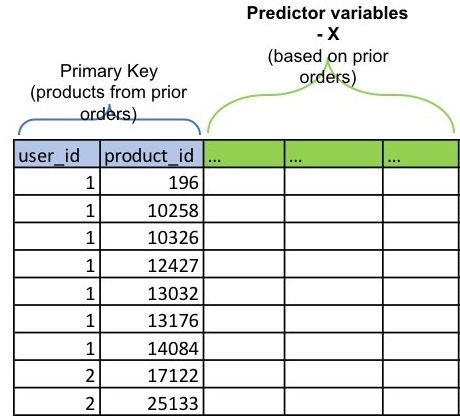

In [4]:
import pandas as pd               # for data manipulation
import numpy as np                # for aggregation functions
import gc                         # for clean-up memory

모든 주문 (prior, train, test)
metadata (order hour/day)
이전 주문에서 구매한 모든 제품을 포함하는 (order_products_prior)

In [1]:
orders = pd.read_csv('../dataset/orders.csv')
order_products_prior = pd.read_csv('../dataset/order_products__prior.csv')

# Get the product tables also --> To create metrics for aisles / departments 
products = pd.read_csv('../dataset/products.csv')
products.product_name = products.product_name.str.replace(' ', '_').str.lower()
products.product_name = products.product_name.str.replace(',', '-').str.lower()

NameError: name 'pd' is not defined

주문, 이전 주문에서 구매한 제품으로 데이터 프레임 생성

In [6]:
prd = orders.merge(order_products_prior, on='order_id', how='left')
prd.head()

# Optionally we can get the name of the products
#prd['product_name'] = products.product_name.str.replace(' ', '_').str.lower()
#prd['product_name'] = products.product_name.str.replace(',', '-').str.lower()
#TRIM DATASETS
#prd = prd.iloc[0:100000]
#prd = prd.iloc[0:15434766]
gc.collect()

80

#### 최종 데이터 프레임 생성 - 주요 유저 X products (uxp)

첫 번째 피처 = 사용자가 제품을 구매한 총 횟수

In [12]:
uxp = prd.groupby(['user_id', 'product_id'])[['order_id']].count()
uxp.columns = ['uxp_total_bought']
uxp = uxp.reset_index()
uxp


,user_id,product_id,uxp_total_bought
0,1,196.0,10
1,1,10258.0,9
2,1,10326.0,1
3,1,12427.0,10
4,1,13032.0,3
...,...,...,...
13307948,206209,43961.0,3
13307949,206209,44325.0,1
13307950,206209,48370.0,1
13307951,206209,48697.0,1


#### user x product feature 생성

사용자 제품 재주문 빈도

In [15]:
#Does users frequently reorder a product? (one-shot ratio)
item_one = uxp[uxp.uxp_total_bought==1].groupby('product_id')[['uxp_total_bought']].count()
item_one.columns = ['uxp_customers_one_shot']
item_size = uxp.groupby('product_id')[['user_id']].count()
item_size.columns = ['uxp_unique_customers']

userxproduct_var= item_one.merge(item_size, how='left', left_index=True, right_on='product_id')
userxproduct_var['one_shot_ratio_product'] = userxproduct_var.uxp_customers_one_shot / userxproduct_var.uxp_unique_customers
userxproduct_var = userxproduct_var.reset_index()


###########
uxp = uxp.merge(userxproduct_var[['product_id', 'one_shot_ratio_product']],how='left')
gc.collect()

uxp


,user_id,product_id,uxp_total_bought,one_shot_ratio_product
0,1,196.0,10,0.417500
1,1,10258.0,9,0.447038
2,1,10326.0,1,0.478419
3,1,12427.0,10,0.470518
4,1,13032.0,3,0.520218
...,...,...,...,...
13307948,206209,43961.0,3,0.485358
13307949,206209,44325.0,1,0.710110
13307950,206209,48370.0,1,0.407439
13307951,206209,48697.0,1,0.739338


: 